## Adrian Lievano Wanderjaunt 
### Data Science Challenge Code Submission

#### Date: 12/25/2019

### Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from dateutil.parser import parse

!pip install pandasql


In [2]:
import pandasql as ps


# Exploration & Cleaning of Data Sets

## Exploring Scraped_Data.csv 

In [3]:
df_scraped_data_raw = pd.read_csv('scraped_data/scraped_data.csv')

In [4]:
df_scraped_data_raw.head(2)

,scraping_id,scraped_date,date,price,available
0,2,2018-03-15,2018-04-01,250,1
1,2,2018-03-15,2018-04-02,115,1


In [5]:
df_scraped_data_raw.describe()

,scraping_id,price,available
count,1.630018e+07,1.630018e+07,1.630018e+07
mean,8.859516e+06,3.068724e+02,4.880770e-01
std,1.058208e+07,8.637483e+02,4.998578e-01
min,2.000000e+00,1.000000e+01,0.000000e+00
25%,3.835000e+03,1.000000e+02,0.000000e+00
50%,1.293900e+04,1.590000e+02,0.000000e+00
75%,2.147308e+07,3.000000e+02,1.000000e+00
max,2.470754e+07,2.500000e+04,1.000000e+00


In [6]:
df_scraped_data_raw.shape

(16300175, 5)

note: we have 1.6 M listings on their price and whether or not they are available

In [7]:
df_scraped_data_raw.dtypes

scraping_id      int64
scraped_date    object
date            object
price            int64
available        int64
dtype: object

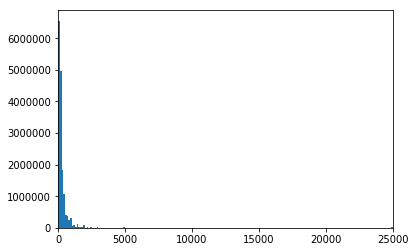

In [8]:
plt.hist(df_scraped_data_raw['price'], bins=200)
plt.xlim(0, df_scraped_data_raw['price'].max())

plt.show()

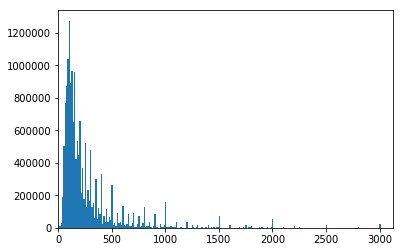

In [9]:
plt.hist(df_scraped_data_raw['price'], bins=2000)
plt.xlim(0, df_scraped_data_raw['price'].max()/8.0)

plt.show()

In [10]:
df_scraped_data_raw['price'].describe()

count    1.630018e+07
mean     3.068724e+02
std      8.637483e+02
min      1.000000e+01
25%      1.000000e+02
50%      1.590000e+02
75%      3.000000e+02
max      2.500000e+04
Name: price, dtype: float64

Notes: there are some outliers in our dataset. We won't remove them for now, but if we plan to build a prediction algorithm on price, this is important to consider.

note: there are outliers in our price dataset and it's difficult to visualize the distribution. We have a right-skewed distribution'

#### Exploring scraped_date & date

In [126]:
df_scraped_data_raw['scraped_date'].head()

0    2018-03-15
1    2018-03-15
2    2018-03-15
3    2018-03-15
4    2018-03-15
Name: scraped_date, dtype: object

In [38]:
df_scraped_data_raw['date'].head()

0    2018-04-01
1    2018-04-02
2    2018-04-03
3    2018-04-04
4    2018-04-05
Name: date, dtype: object

In [39]:
df_scraped_data_raw['scraped_date'][0]

'2018-03-15'

In [40]:
unique_ids = df_scraped_data_raw['scraping_id'].unique()

In [41]:
unique_ids

array([       2,        3,        4, ..., 24696771, 24704235, 24707544])

In [117]:
df = df_scraped_data_raw[(df_scraped_data_raw['scraping_id'] == 2) & 
                         (df_scraped_data_raw['scraped_date'] == '2018-03-15')] 
df

,scraping_id,scraped_date,date,price,available
0,2,2018-03-15,2018-04-01,250,1
1,2,2018-03-15,2018-04-02,115,1
2,2,2018-03-15,2018-04-03,115,1
3,2,2018-03-15,2018-04-04,115,1
4,2,2018-03-15,2018-04-05,150,0
5,2,2018-03-15,2018-04-06,153,0
6,2,2018-03-15,2018-04-07,152,0
7,2,2018-03-15,2018-04-08,115,1
8,2,2018-03-15,2018-04-09,115,1
9,2,2018-03-15,2018-04-10,115,1


In [125]:
fig = px.scatter(df, x="date", y="price", title='Price vs. Date',
                color = 'available')
fig.show()

There are 5647 unique scraping ids in the over 1.6MM scrapped listings

In [44]:
df_scraped_raw_unavailable = df_scraped_data_raw[df_scraped_data_raw['available'] == 0]
df_scraped_raw_available = df_scraped_data_raw[df_scraped_data_raw['available'] == 1]


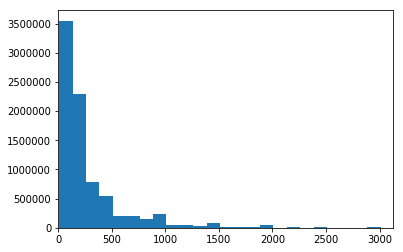

In [127]:
plt.hist(df_scraped_raw_unavailable['price'], bins = 200);
plt.xlim(0, df_scraped_raw_unavailable['price'].max()/8.0)
plt.show()

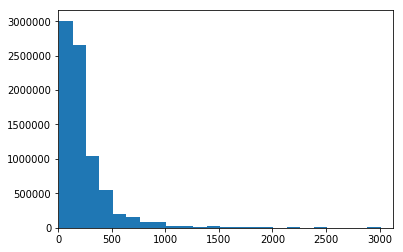

In [46]:
plt.hist(df_scraped_raw_available['price'], bins = 200);
plt.xlim(0, df_scraped_raw_available['price'].max()/8.0)
plt.show()

In [130]:
sorted(df_scraped_data_raw['scraped_date'].unique())

['2018-03-15',
 '2018-03-16',
 '2018-03-17',
 '2018-03-18',
 '2018-03-19',
 '2018-03-20',
 '2018-03-21',
 '2018-03-22',
 '2018-03-23',
 '2018-03-24',
 '2018-03-25',
 '2018-03-26',
 '2018-03-27',
 '2018-03-28',
 '2018-03-29',
 '2018-03-30',
 '2018-03-31',
 '2018-04-01',
 '2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-04-05',
 '2018-04-06',
 '2018-04-07',
 '2018-04-08',
 '2018-04-09',
 '2018-04-10',
 '2018-04-11',
 '2018-04-12',
 '2018-04-13',
 '2018-04-14',
 '2018-04-15',
 '2018-04-16',
 '2018-04-17',
 '2018-04-18',
 '2018-04-19',
 '2018-04-20',
 '2018-04-21',
 '2018-04-22',
 '2018-04-23',
 '2018-04-24',
 '2018-04-25',
 '2018-04-26',
 '2018-04-27',
 '2018-04-28',
 '2018-04-29',
 '2018-04-30',
 '2018-05-01',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-05-06',
 '2018-05-07',
 '2018-05-08',
 '2018-05-09',
 '2018-05-10',
 '2018-05-11',
 '2018-05-12',
 '2018-05-13',
 '2018-05-14',
 '2018-05-15',
 '2018-05-16',
 '2018-05-17',
 '2018-05-18',
 '2018-05-19',
 '2018-05-

In [131]:
sorted(df_scraped_data_raw['date'].unique())

['2018-04-01',
 '2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-04-05',
 '2018-04-06',
 '2018-04-07',
 '2018-04-08',
 '2018-04-09',
 '2018-04-10',
 '2018-04-11',
 '2018-04-12',
 '2018-04-13',
 '2018-04-14',
 '2018-04-15',
 '2018-04-16',
 '2018-04-17',
 '2018-04-18',
 '2018-04-19',
 '2018-04-20',
 '2018-04-21',
 '2018-04-22',
 '2018-04-23',
 '2018-04-24',
 '2018-04-25',
 '2018-04-26',
 '2018-04-27',
 '2018-04-28',
 '2018-04-29',
 '2018-04-30',
 '2018-05-01',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-05-06',
 '2018-05-07',
 '2018-05-08',
 '2018-05-09',
 '2018-05-10',
 '2018-05-11',
 '2018-05-12',
 '2018-05-13',
 '2018-05-14',
 '2018-05-15',
 '2018-05-16',
 '2018-05-17',
 '2018-05-18',
 '2018-05-19',
 '2018-05-20',
 '2018-05-21',
 '2018-05-22',
 '2018-05-23',
 '2018-05-24',
 '2018-05-25',
 '2018-05-26',
 '2018-05-27',
 '2018-05-28',
 '2018-05-29',
 '2018-05-30',
 '2018-05-31']

## Exploring Scraped Listings 

In [47]:
df_scraped_listings_raw = pd.read_csv('scraped_data/scraped_listings.csv', encoding="ISO-8859-1")

In [48]:
df_scraped_listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8445 entries, 0 to 8444
Data columns (total 14 columns):
scraping_id        8445 non-null int64
listing            8445 non-null object
city               8445 non-null object
lon                8445 non-null float64
lat                8445 non-null float64
mapped_location    8445 non-null object
name               8445 non-null object
capacity           8445 non-null int64
bathrooms          8445 non-null object
bedrooms           8445 non-null object
has_pool           8445 non-null int64
cleaning_fee       8445 non-null object
is_superhost       8445 non-null int64
host_name          8445 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 923.8+ KB


In [49]:
df_scraped_listings_raw.head(1)

,scraping_id,listing,city,lon,lat,mapped_location,name,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost,host_name
0,2,https://www.airbnb.com/rooms/17720788,Scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2,1,150,1,Mj


In [50]:
df_scraped_listings_raw.shape

(8445, 14)

#### Exploring the Cities Column

In [51]:
cities = df_scraped_listings_raw['city'].unique()
sorted(cities)

['??',
 'Anthem',
 'Apache Junction',
 'Avondale',
 'Black Canyon City',
 'Buckeye',
 'Carefree',
 'Casa Grande',
 'Cave Creek',
 'Chandler',
 'Coolidge',
 'Downtown Phoenix',
 'El Mirage',
 'Flagstaff',
 'Florence',
 'Fort McDowell',
 'Fountain Hills',
 'Gilbert',
 'Glendale',
 'Gold Canyon',
 'Goodyear',
 'LAVEEN',
 'Laveen',
 'Litchfield Park',
 'Maricopa',
 'Maricopa County',
 'Mesa',
 'Morristown',
 'New River',
 'New River ',
 'Old Town Scottsdale ',
 'Paradise Valley',
 'Peoria',
 'Phoenix',
 'Phoenix ',
 'Phoenix  ',
 'Queen Creek',
 'Rio Verde',
 'San Tan Valley',
 'Scottsdale',
 'Scottsdale ',
 'Sun City',
 'Sun City West',
 'Sun Lakes',
 'Surprise',
 'Surprise, Arizona, US',
 'Tempe',
 'Tolleson',
 'Waddell',
 'Wittmann',
 'Youngtown',
 'phoenix',
 'scottsdale']

Note: from initial inspection, there seems to be city with ?? which might indicate an error. A few columns have lower case words and extra spacings. To solve this, we'll classify a few different error types and recategorize the listings city column based on this logic.

    1) City names should all be lowercased and stripped of spaces. Each listing in the df_listings dataframe needs to then be updated. We'll create some functions to do that. 
    2) Some of the listings might include US by mistake (e.g Surprise, Arizona, US). For future use, we should maintain a dictionary of proper listings and remove any text that doesn't match a city in the USA (if this is the market). 

In [52]:
df_scraped_listings_raw['city'].unique()

array(['Scottsdale', 'Phoenix', 'Tempe', 'Paradise Valley', 'Mesa',
       'Gilbert', 'Glendale', 'scottsdale', 'Maricopa County', 'Chandler',
       'Fountain Hills', 'Peoria', 'Cave Creek', 'Tolleson', 'Avondale',
       'Litchfield Park', 'Laveen', 'San Tan Valley', 'Surprise',
       'Queen Creek', 'Goodyear', 'LAVEEN', 'Sun City', 'Sun City West',
       'Rio Verde', 'Maricopa', 'Anthem', 'Gold Canyon', 'New River',
       'Apache Junction', 'Sun Lakes', 'Carefree', 'Old Town Scottsdale ',
       'El Mirage', 'Phoenix  ', 'Buckeye', 'Waddell', 'Casa Grande',
       'New River ', 'Morristown', 'Scottsdale ', 'Fort McDowell',
       'Flagstaff', 'Phoenix ', 'Downtown Phoenix', 'Florence', 'phoenix',
       'Surprise, Arizona, US', '??', 'Black Canyon City', 'Wittmann',
       'Coolidge', 'Youngtown'], dtype=object)

df_scraped_listings_raw['city'] = df_scraped_listings_raw['city'].str.lower().str.strip()

In [53]:
def fix_str_col(df, col):
    #get rid of edge case where the user added more than just city 
    df.loc[df[col] == 'Surprise, Arizona, US', col] = 'Surprise'
    
    #normalize names and remove trialing or leading whitespaces
    df[col] = df[col].str.strip().str.lower()


In [54]:
fix_str_col(df_scraped_listings_raw, col = 'city')

In [55]:
cities = sorted(df_scraped_listings_raw['city'].unique())
cities

['??',
 'anthem',
 'apache junction',
 'avondale',
 'black canyon city',
 'buckeye',
 'carefree',
 'casa grande',
 'cave creek',
 'chandler',
 'coolidge',
 'downtown phoenix',
 'el mirage',
 'flagstaff',
 'florence',
 'fort mcdowell',
 'fountain hills',
 'gilbert',
 'glendale',
 'gold canyon',
 'goodyear',
 'laveen',
 'litchfield park',
 'maricopa',
 'maricopa county',
 'mesa',
 'morristown',
 'new river',
 'old town scottsdale',
 'paradise valley',
 'peoria',
 'phoenix',
 'queen creek',
 'rio verde',
 'san tan valley',
 'scottsdale',
 'sun city',
 'sun city west',
 'sun lakes',
 'surprise',
 'tempe',
 'tolleson',
 'waddell',
 'wittmann',
 'youngtown']

In [56]:
len(cities)

45

note: we removed 7 categories of cities

#### Exploring Longitude & Latitude Column

In [57]:
latitudes = df_scraped_listings_raw['lat'].unique()
print(len(latitudes))

8445


note: there are latitudes & longitudes that vary up to the 9th decimal place. Latitude and longitude, however, might be better represented by the city, state, country, and zip code as a feature. We'll keep it for now and treat it as a continous feature in the dataframe. 

In [58]:
df_scraped_listings_raw.describe()

,scraping_id,lon,lat,capacity,has_pool,is_superhost
count,8.445000e+03,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000
mean,1.022693e+07,-111.967109,33.510719,6.053641,0.730847,0.241445
std,1.086948e+07,0.167902,0.133915,3.282324,0.443546,0.427985
min,2.000000e+00,-112.712487,32.840029,1.000000,0.000000,0.000000
25%,5.753000e+03,-112.052714,33.450837,4.000000,0.000000,0.000000
50%,1.487100e+04,-111.935227,33.501307,6.000000,1.000000,0.000000
75%,2.188136e+07,-111.897167,33.601196,8.000000,1.000000,0.000000
max,2.470754e+07,-111.367664,34.076572,26.000000,1.000000,1.000000


In [59]:
len(df_scraped_listings_raw['scraping_id'].unique())

8445

#### Exploring Name in the Listing dataframe

In [60]:
df_scraped_listings_raw['name'].unique()

array(['Old Town Scottsdale Vacation Home & GIANTS Rental',
       'Upscale Townhouse South Scottsdale',
       'North Scottsdale/ PV Private Guest House w/pool', ...,
       'The Adobe Guest House "By the Kokes"-Historic Phx',
       'Super clean Power ranch home', '*THE lovely RED*'], dtype=object)

Note: interesting to note is that there are 8445 unique scrapping ID names, but only 8296 unique names for the listings. Which ones are duplicated?

In [61]:
unique_names = list(df_scraped_listings_raw['name'].unique())

In [62]:
df_scraped_listings_raw[df_scraped_listings_raw['name'].duplicated() == True]

,scraping_id,listing,city,lon,lat,mapped_location,name,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost,host_name
776,1231,https://www.airbnb.com/rooms/14672894,peoria,-112.213829,33.574390,https://maps.google.com/maps?q=33.574390092184...,Desert Oasis,14,2,4,1,50,1,Bradley
935,1435,https://www.airbnb.com/rooms/16380680,scottsdale,-111.908225,33.481699,https://maps.google.com/maps?q=33.481699118039...,Scottsdale Two Bedroom Vacation Rental,6,2,2,1,89,0,Jon
1076,1621,https://www.airbnb.com/rooms/17359373,scottsdale,-111.908778,33.483646,https://maps.google.com/maps?q=33.483645880445...,Scottsdale One Bedroom Vacation Rental,2,1,1,1,59,0,Jon
1313,2442,https://www.airbnb.com/rooms/1900408,scottsdale,-111.908869,33.492525,https://maps.google.com/maps?q=33.492524719107...,Modern Old Town Scottsdale Condo,5,2,2,1,125,0,Laura
1478,3232,https://www.airbnb.com/rooms/4006488,scottsdale,-111.903549,33.684806,https://maps.google.com/maps?q=33.684805794154...,North Scottsdale Casita,2,1,0,0,30,1,Mike And Susan
1650,4024,https://www.airbnb.com/rooms/4787650,scottsdale,-111.894832,33.690405,https://maps.google.com/maps?q=33.690404680022...,Casita,2,1,0,1,30,1,Matthew And Jodi
1761,4483,https://www.airbnb.com/rooms/4931802,scottsdale,-111.924407,33.506215,https://maps.google.com/maps?q=33.506215223188...,Superbowl Rental,5,1.5,2,1,(NULL),0,Michael
1882,4936,https://www.airbnb.com/rooms/5040298,phoenix,-112.053476,33.524955,https://maps.google.com/maps?q=33.524955278488...,"SUPER BOWL condo, prime location",4,1,1,1,(NULL),0,Alice
1983,5291,https://www.airbnb.com/rooms/5084735,phoenix,-111.997372,33.675736,https://maps.google.com/maps?q=33.675735630987...,North Phoenix/Scottsdale,8,2.5,4,0,(NULL),0,Luis
2043,5522,https://www.airbnb.com/rooms/5105440,scottsdale,-111.922789,33.507448,https://maps.google.com/maps?q=33.507447740034...,Old Town Scottsdale Condo,4,2,2,0,(NULL),0,Connor


Note: though some of the names are duplicated, their property features are different, so we'll keep them in our analysis. This might provide insight into why or why not this feature would be useful in predicting price. Name tends to be listed by the host, and sometimes it might add superflurous words. This column is a candidate for removal since most of the description in the name is added in the other column features. We could, in theory, lemmatize this column and add X number of columns that correspond to certain words in the description. We could create a one-hot embedding for these words and use it as a potential feature in price prediction. 

#### Fixing bedroom, bathroom, cleaning fee columns

Problem: Pandas is reading it as a object column. There might be errors in some of the entries, so we'll find and fix that.

In [63]:
df_scraped_listings_raw['bathrooms'].unique()

array(['2.5', '1.5', '1', '2', '3', '3.5', '5', '4.5', '4', '5.5', '7',
       '7.5', '6', '9.5', '8', '6.5', '(NULL)', '0.5', '10', '9', '8.5',
       '0'], dtype=object)

Note: it looks like our bathrooms column should be a float category. But, the (NULL) value is preventing that from happening. So, we'll fix that and subsitute 0.0 for null and set the datatype to float.
'

In [64]:
df_scraped_listings_raw.loc[df_scraped_listings_raw['bathrooms'] == '(NULL)', 'bathrooms'] = 0.0
df_scraped_listings_raw['bathrooms'] = df_scraped_listings_raw['bathrooms'].astype('float32')

In [65]:
df_scraped_listings_raw['bedrooms'].unique()

array(['2', '0', '1', '4', '3', '5', '7', '6', '8', '9', '10', '12',
       '(NULL)'], dtype=object)

In [66]:
df_scraped_listings_raw.loc[df_scraped_listings_raw['bedrooms'] == '(NULL)', 'bedrooms'] = 0.0
df_scraped_listings_raw['bedrooms'] = df_scraped_listings_raw['bedrooms'].astype('float32')

In [67]:
df_scraped_listings_raw['bedrooms'].unique()

array([ 2.,  0.,  1.,  4.,  3.,  5.,  7.,  6.,  8.,  9., 10., 12.])

In [68]:
df_scraped_listings_raw['cleaning_fee'].unique()

array(['150', '85', '75', '100', '110', '80', '90', '125', '50', '40',
       '0', '115', '135', '20', '175', '95', '(NULL)', '120', '300',
       '195', '10', '68', '98', '319', '99', '424', '30', '60', '299',
       '49', '199', '89', '55', '88', '200', '45', '165', '65', '149',
       '18', '275', '5', '350', '257', '35', '250', '29', '130', '105',
       '180', '280', '225', '215', '240', '500', '160', '140', '295',
       '235', '129', '27', '190', '170', '25', '220', '345', '285', '375',
       '59', '53', '70', '155', '360', '69', '325', '79', '258', '219',
       '158', '440', '271', '450', '249', '279', '171', '349', '380',
       '680', '320', '384', '475', '15', '26', '207', '709', '314', '495',
       '399', '400', '625', '550', '600', '700', '428', '39', '12', '128',
       '354', '850', '169', '214', '230', '119', '118', '234', '385',
       '379', '179', '108', '145', '162', '247', '181', '31', '34', '109',
       '36', '290', '224', '559', '19', '959', '1309', '1559', '

In [69]:
df_scraped_listings_raw.loc[df_scraped_listings_raw['cleaning_fee'] == '(NULL)', 'cleaning_fee'] = 0.0
df_scraped_listings_raw['cleaning_fee'] = df_scraped_listings_raw['cleaning_fee'].astype('float32')

In [70]:
df_scraped_listings_raw['cleaning_fee'].unique()

array([ 150.,   85.,   75.,  100.,  110.,   80.,   90.,  125.,   50.,
         40.,    0.,  115.,  135.,   20.,  175.,   95.,  120.,  300.,
        195.,   10.,   68.,   98.,  319.,   99.,  424.,   30.,   60.,
        299.,   49.,  199.,   89.,   55.,   88.,  200.,   45.,  165.,
         65.,  149.,   18.,  275.,    5.,  350.,  257.,   35.,  250.,
         29.,  130.,  105.,  180.,  280.,  225.,  215.,  240.,  500.,
        160.,  140.,  295.,  235.,  129.,   27.,  190.,  170.,   25.,
        220.,  345.,  285.,  375.,   59.,   53.,   70.,  155.,  360.,
         69.,  325.,   79.,  258.,  219.,  158.,  440.,  271.,  450.,
        249.,  279.,  171.,  349.,  380.,  680.,  320.,  384.,  475.,
         15.,   26.,  207.,  709.,  314.,  495.,  399.,  400.,  625.,
        550.,  600.,  700.,  428.,   39.,   12.,  128.,  354.,  850.,
        169.,  214.,  230.,  119.,  118.,  234.,  385.,  379.,  179.,
        108.,  145.,  162.,  247.,  181.,   31.,   34.,  109.,   36.,
        290.,  224.,

#### Explore Host Name Column

In [71]:
hosts = df_scraped_listings_raw['host_name'].unique()
sorted(hosts)

['(Email hidden by Airbnb)',
 '(Hidden by Airbnb)',
 '(NULL)',
 '(We Are) Bonnie & Ky',
 'A',
 'AJ & Dina',
 'Aaron',
 'Abbie',
 'Abby',
 'Abdul',
 'Abel',
 'Abhay',
 'Abigail',
 'Abriee',
 'Abs',
 'Abukar',
 'Adam',
 'Adam & Serene',
 'Adam And Ginger',
 'Addison',
 'Adele',
 'Adell',
 'Adnan',
 'Adolfo',
 'Adrian',
 'Adrianna',
 'Adrianne',
 'Adrienne',
 'Agata',
 'Agustin',
 'Ainslie',
 'Aishah&Daniel',
 'Aj',
 'Akash',
 'Akeem',
 'Al',
 'Al And Michele',
 'Alan',
 'Alana',
 'Alana & Richard',
 'Alanna',
 'Albert',
 'Alcide',
 'Aldo',
 'Alecia',
 'Alejandro',
 'Aleksandra',
 'Alen',
 'Alessandro',
 'Alex',
 'Alex & Anna',
 'Alexa',
 'Alexander',
 'Alexandra',
 'Alexia',
 'Alexis',
 'Alexis And Shane',
 'Alexus',
 'Aleyda',
 'Alfredo',
 'Ali',
 'Alice',
 'Alicia',
 'Aline',
 'Alisa',
 'Alisha',
 'Alisha And David',
 'Alison',
 'Alix',
 'Allan',
 'Allen',
 'Allie',
 'Allisa',
 'Allison',
 'Alloush',
 'Ally',
 'Allyson Joelle',
 'Alma',
 'Aloha',
 'Alona & Alex',
 'Alyona',
 'Alyse And

In [72]:
len(hosts)

2200

Note: from the initial exploration, it looks like we have 2200 unique hosts. Upon initial inspection, some of the names look odd, but it's probably better to leave the columns in the database for now as we don't know how the names are being authenticated

##### Set cleaned dataframe into new dataframe for future merge

In [73]:
df_scraped_listings_clean = df_scraped_listings_raw

In [74]:
df_scraped_listings_clean.describe()

,scraping_id,lon,lat,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost
count,8.445000e+03,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000
mean,1.022693e+07,-111.967109,33.510719,6.053641,1.988455,2.462167,0.730847,122.724808,0.241445
std,1.086948e+07,0.167902,0.133915,3.282324,0.953293,1.380607,0.443546,112.535988,0.427985
min,2.000000e+00,-112.712487,32.840029,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.753000e+03,-112.052714,33.450837,4.000000,1.000000,2.000000,0.000000,40.000000,0.000000
50%,1.487100e+04,-111.935227,33.501307,6.000000,2.000000,2.000000,1.000000,100.000000,0.000000
75%,2.188136e+07,-111.897167,33.601196,8.000000,2.000000,3.000000,1.000000,171.000000,0.000000
max,2.470754e+07,-111.367664,34.076572,26.000000,10.000000,12.000000,1.000000,1559.000000,1.000000


In [75]:
df_scraped_listings_clean.corr()

,scraping_id,lon,lat,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost
scraping_id,1.000000,0.035396,-0.029798,-0.011129,0.002433,-0.019871,0.024199,0.052725,-0.117821
lon,0.035396,1.000000,-0.281938,0.027121,0.042680,0.011919,0.135094,0.079885,-0.000854
lat,-0.029798,-0.281938,1.000000,0.083951,0.111978,0.068326,0.072613,0.104634,-0.031816
capacity,-0.011129,0.027121,0.083951,1.000000,0.713181,0.848805,0.119734,0.559200,-0.052215
bathrooms,0.002433,0.042680,0.111978,0.713181,1.000000,0.804393,0.158319,0.590246,-0.121465
bedrooms,-0.019871,0.011919,0.068326,0.848805,0.804393,1.000000,0.100662,0.591308,-0.098280
has_pool,0.024199,0.135094,0.072613,0.119734,0.158319,0.100662,1.000000,0.187546,-0.082472
cleaning_fee,0.052725,0.079885,0.104634,0.559200,0.590246,0.591308,0.187546,1.000000,-0.120351
is_superhost,-0.117821,-0.000854,-0.031816,-0.052215,-0.121465,-0.098280,-0.082472,-0.120351,1.000000


##### High Level Visualization to Check if we might have interdependent features, which could harm the performance of final prediction algorithms

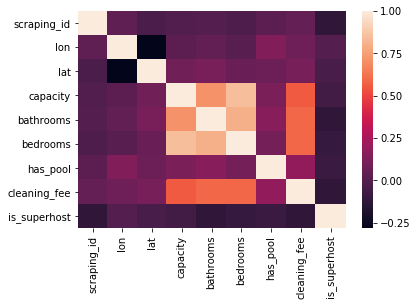

In [76]:
sns.heatmap(df_scraped_listings_clean.corr())
plt.show()

## Merging the Datasets

In [77]:
df_merge_clean = df_scraped_data_raw.merge(df_scraped_listings_clean, how='inner', on='scraping_id')
df_merge_clean['month'] = pd.DatetimeIndex(df_merge_clean['date']).month


In [78]:
df_merge_clean.head(1)

,scraping_id,scraped_date,date,price,available,listing,city,lon,lat,mapped_location,name,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost,host_name,month
0,2,2018-03-15,2018-04-01,250,1,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4


In [79]:
df_merge_clean.shape

(16300175, 19)

In [80]:
df_merge_clean.corr()

,scraping_id,price,available,lon,lat,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost,month
scraping_id,1.000000,-0.037245,0.103135,0.029203,-0.004089,-0.018602,0.008185,-0.020358,0.020710,0.051396,-0.085667,0.026577
price,-0.037245,1.000000,-0.012002,-0.044146,0.064523,0.165192,0.237654,0.190410,0.028217,0.120436,-0.078070,-0.020683
available,0.103135,-0.012002,1.000000,0.052669,0.050783,0.061080,0.071307,0.068831,0.015627,0.131445,-0.041079,0.085889
lon,0.029203,-0.044146,0.052669,1.000000,0.186281,0.124593,0.167221,0.103148,0.288107,0.183384,-0.047089,-0.013116
lat,-0.004089,0.064523,0.050783,0.186281,1.000000,0.150180,0.218050,0.185605,0.138623,0.218310,-0.101284,-0.009221
capacity,-0.018602,0.165192,0.061080,0.124593,0.150180,1.000000,0.651874,0.819966,0.070568,0.543482,-0.029455,-0.034780
bathrooms,0.008185,0.237654,0.071307,0.167221,0.218050,0.651874,1.000000,0.787655,0.125846,0.585012,-0.109024,-0.030443
bedrooms,-0.020358,0.190410,0.068831,0.103148,0.185605,0.819966,0.787655,1.000000,0.048378,0.591542,-0.073501,-0.035978
has_pool,0.020710,0.028217,0.015627,0.288107,0.138623,0.070568,0.125846,0.048378,1.000000,0.168738,-0.069666,-0.010125
cleaning_fee,0.051396,0.120436,0.131445,0.183384,0.218310,0.543482,0.585012,0.591542,0.168738,1.000000,-0.096194,-0.019600


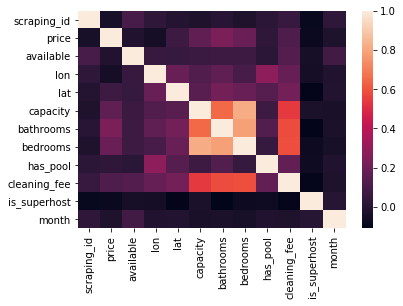

In [81]:
sns.heatmap(df_merge_clean.corr())
plt.show()

In [82]:
sql = """SELECT
             scraping_id, scraped_date, date, AVG(price) as avg_price
        FROM 
            df_merge_clean
        GROUP BY
            scraping_id, scraped_date
        ORDER BY date, avg_price DESC"""

In [83]:
df_scrap_sql = ps.sqldf(sql, locals())


In [ ]:
df_scrap_sql

## Question 3: In which month do properties appear to generate more revenue? April or May?

In [181]:
sql1 = """SELECT
           month,  sum(price) as tot_potential_revenue
        FROM 
            df_merge_clean
        GROUP BY
            month
        ORDER BY tot_potential_revenue DESC"""

In [182]:
df_question_3 = ps.sqldf(sql1, locals())


In [183]:
df_question_3

,month,tot_potential_revenue
0,5,3072687123
1,4,1929386804


### Which month do properities can potentially generate more revenue if only booked listings are considered?

In [134]:
sql1 = """SELECT
           month,  sum(price) as tot_potential_revenue
        FROM 
            df_merge_clean
        GROUP BY
            month
        WHERE
            availabile = 0
        ORDER BY tot_potential_revenue DESC"""

## Question 4: How much more revenue do places with 3 bedrooms make vs. places with 2 bedrooms?


In [142]:
sql2 = """SELECT
             bedrooms, sum(price) as tot_potential_revenue
        FROM 
            df_merge_clean
        GROUP BY
            bedrooms
        ORDER BY tot_potential_revenue DESC"""

df_bedroom_question = ps.sqldf(sql2, locals())


In [144]:
df_bedroom_question

,bedrooms,tot_potential_revenue
0,3.0,1583590441
1,2.0,1172410245
2,4.0,986792599
3,5.0,462062839
4,1.0,357635222
5,6.0,184001642
6,8.0,83602391
7,7.0,70727181
8,0.0,58982565
9,10.0,20622913


In [171]:
df_bedroom_question[df_bedroom_question['bedrooms'] == 3]['tot_potential_revenue'][0] - df_bedroom_question[df_bedroom_question['bedrooms'] == 2]['tot_potential_revenue'][1]

411180196

### How much more revenue do 3- or 2-bedroom listings with booked listings appear to generate?

In [ ]:
sql2_5 = """SELECT
             bedrooms, sum(price) as tot_potential_revenue
        FROM 
            df_merge_clean
        GROUP BY
            bedrooms
        WHERE
            available = 0
        ORDER BY tot_potential_revenue DESC"""

In [ ]:
df_bedroom_question2_5 = ps.sqldf(sql2_5, locals())


In [ ]:
df_bedroom_question2_5

# Other Insights

#### What are the most valuable cities for 3-bedroom or 2-bedroom apartments?

In [84]:
sql = """SELECT
            city, bedrooms, sum(price) as tot_potential_revenue
        FROM 
            df_merge_clean
        GROUP BY
            city, bedrooms
        ORDER BY tot_potential_revenue DESC"""

In [85]:
df_other_city_rev = ps.sqldf(sql, locals())

In [86]:
df_other_city_rev

,city,bedrooms,tot_potential_revenue
0,phoenix,3.0,845253517
1,scottsdale,3.0,658871994
2,scottsdale,2.0,645439521
3,scottsdale,4.0,594337353
4,phoenix,2.0,421993391
5,phoenix,4.0,340580014
6,scottsdale,5.0,283672869
7,scottsdale,1.0,199765282
8,phoenix,5.0,164990730
9,scottsdale,6.0,153353371


#### How much of a difference does being a superhost, on average, have on the price of a listing?

In [87]:
sql = """SELECT
            is_superhost, sum(price) as tot_potential_revenue
        FROM 
            df_merge_clean
        GROUP BY
            is_superhost
        ORDER BY tot_potential_revenue DESC"""

In [88]:
df_superhost = ps.sqldf(sql, locals())

In [90]:
df_superhost

,is_superhost,tot_potential_revenue
0,0,4184111495
1,1,817962432


In [93]:
df_merge_clean[df_merge_clean['is_superhost'] ==1].count()

scraping_id        4236395
scraped_date       4236395
date               4236395
price              4236395
available          4236395
listing            4236395
city               4236395
lon                4236395
lat                4236395
mapped_location    4236395
name               4236395
capacity           4236395
bathrooms          4236395
bedrooms           4236395
has_pool           4236395
cleaning_fee       4236395
is_superhost       4236395
host_name          4236395
month              4236395
dtype: int64

In [95]:
df_merge_clean[df_merge_clean['is_superhost'] ==0].count()

scraping_id        12063780
scraped_date       12063780
date               12063780
price              12063780
available          12063780
listing            12063780
city               12063780
lon                12063780
lat                12063780
mapped_location    12063780
name               12063780
capacity           12063780
bathrooms          12063780
bedrooms           12063780
has_pool           12063780
cleaning_fee       12063780
is_superhost       12063780
host_name          12063780
month              12063780
dtype: int64

#### Which features are most likely to be interdependent on others? What is their variance inflation?

In [ ]:
%matplotlib.inline
sns.pairplot(df_merge_clean[['bathrooms','bedrooms','capacity', 'cleaning_fee']])

In [102]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices

#y, X = dmatrices('price - bathrooms + bedrooms + capacity + cleaning_fee', df_merge_clean, return_type = 'dataframe')
X = df_merge_clean[['bathrooms', 'bedrooms','capacity', 'cleaning_fee']]
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [103]:
vif

,vif_factor,features
0,13.453956,bathrooms
1,23.127717,bedrooms
2,14.651957,capacity
3,3.598070,cleaning_fee


## Building a Prediction Algorithm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_df = pd.DataFrame()
y = df_merge_clean['price']

for col in df_merge_clean:
    if col not in y.columns:
        feature_df[col] = df[col]

X = feature_df


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Understanding Unavailability and Whether or Not it is True

In [105]:
df_unavailable = df_merge_clean[df_merge_clean['available'] == 0]

In [111]:
df_unavailable.sort_values(by = ['scraping_id', 'price'], ascending = True)

,scraping_id,scraped_date,date,price,available,listing,city,lon,lat,mapped_location,name,capacity,bathrooms,bedrooms,has_pool,cleaning_fee,is_superhost,host_name,month
621,2,2018-03-25,2018-04-12,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
622,2,2018-03-25,2018-04-13,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
623,2,2018-03-25,2018-04-14,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
629,2,2018-03-25,2018-04-20,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
630,2,2018-03-25,2018-04-21,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
631,2,2018-03-25,2018-04-22,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
632,2,2018-03-25,2018-04-23,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
633,2,2018-03-25,2018-04-24,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
634,2,2018-03-25,2018-04-25,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
635,2,2018-03-25,2018-04-26,115,0,https://www.airbnb.com/rooms/17720788,scottsdale,-111.916935,33.496566,https://maps.google.com/maps?q=33.496565678911...,Old Town Scottsdale Vacation Home & GIANTS Rental,7,2.5,2.0,1,150.0,1,Mj,4
